# ImageNetで訓練済みのニューラルネットを
# 用いた画像の分類

以下ではCorel画像データセットの一部を使い画像分類を試みます。

分類はSVMとニューラルネット(MLP)の両方で実行し比較する


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3  #20%
session = tf.Session(config=config)
import keras
from keras import backend as K
K.set_session(session) 

Using TensorFlow backend.


# VGG19を訓練済みDNN (ImageNet)として利用

In [2]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np


In [3]:
Corel_fc2_training = np.empty((0,4096),float)
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer('fc2').output)

import os
num_classes = 30
num_images = 20
step = 100
flist = []
for i in range(num_classes):
    for j in range(num_images):
        k = j+1
        name = step * i + k
        flist.append(str(name)+".jpg")

# print(flist)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of cbe5617147190e668d6c5d5026f83318 so we will re-download the data.
574717952/574710816 [==============================] - 857s 1us/step


In [4]:
# 訓練データの処理       
total_images = 600
for i in range(total_images):
    if i % 100 == 0:
        print("Processing ...",(i+1)," data...")
    img_path = "C:/Users/jtcuser/DeepLearning/data/Corel30/Corel30Train/all/"+flist[i] 
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fc2_ft = model.predict(x)
    fc2_ft = np.array(fc2_ft)
    Corel_fc2_training = np.append(Corel_fc2_training, fc2_ft,axis=0)

print (Corel_fc2_training.shape)
np.save('npy/Corel_fc2_training.npy',Corel_fc2_training)


Processing ... 1  data...
Processing ... 101  data...
Processing ... 201  data...
Processing ... 301  data...
Processing ... 401  data...
Processing ... 501  data...
(600, 4096)


In [5]:
num_files = 5
num_classes = 30
step = 100
flist_test = []

for i in range(num_classes):
    for j in range(num_files):
        k = j+1
        name = step * i + k + 20
        flist_test.append(str(name)+".jpg")

print(flist_test)

['21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '221.jpg', '222.jpg', '223.jpg', '224.jpg', '225.jpg', '321.jpg', '322.jpg', '323.jpg', '324.jpg', '325.jpg', '421.jpg', '422.jpg', '423.jpg', '424.jpg', '425.jpg', '521.jpg', '522.jpg', '523.jpg', '524.jpg', '525.jpg', '621.jpg', '622.jpg', '623.jpg', '624.jpg', '625.jpg', '721.jpg', '722.jpg', '723.jpg', '724.jpg', '725.jpg', '821.jpg', '822.jpg', '823.jpg', '824.jpg', '825.jpg', '921.jpg', '922.jpg', '923.jpg', '924.jpg', '925.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1121.jpg', '1122.jpg', '1123.jpg', '1124.jpg', '1125.jpg', '1221.jpg', '1222.jpg', '1223.jpg', '1224.jpg', '1225.jpg', '1321.jpg', '1322.jpg', '1323.jpg', '1324.jpg', '1325.jpg', '1421.jpg', '1422.jpg', '1423.jpg', '1424.jpg', '1425.jpg', '1521.jpg', '1522.jpg', '1523.jpg', '1524.jpg', '1525.jpg', '1621.jpg', '1622.jpg', '1623.jpg', '1624.jpg', '1625.jpg', '1721.jpg', '1722.jpg', '1723.jpg'

In [6]:
# 未知データ（クエリ）の準備
num_test_images = 150
Corel_fc2_query = np.empty((0,4096),float)

for i in range(num_test_images):
    img_path = 'C:/Users/jtcuser/DeepLearning/data/Corel30/Corel30Test/'+flist_test[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fc2_ft = model.predict(x)
    fc2_ft = np.array(fc2_ft)
    Corel_fc2_query = np.append(Corel_fc2_query, fc2_ft, axis=0)

print (Corel_fc2_query.shape)
np.save('npy/Corel_fc2_query.npy',Corel_fc2_query)

(150, 4096)


In [7]:
import numpy as np
# data = np.load('./fc2_training.npy')
# print("dimension of data = ",data.shape)

data = Corel_fc2_training
numTrain = data.shape[0]
numFeatures = data.shape[1]
print(data.shape)

truth = np.zeros(numTrain, dtype=int)
for i in range(numTrain):
    truth[i] = i / 20
print(truth.shape)

testTruth = np.zeros(num_test_images, dtype=int)
for i in range(num_test_images):
    testTruth[i] = i / 5
print(testTruth.shape)

(600, 4096)
(600,)
(150,)


In [8]:
# 混合行列の描画関数の定義
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=25)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)

In [9]:
print(Corel_fc2_query.shape)

(150, 4096)


Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0

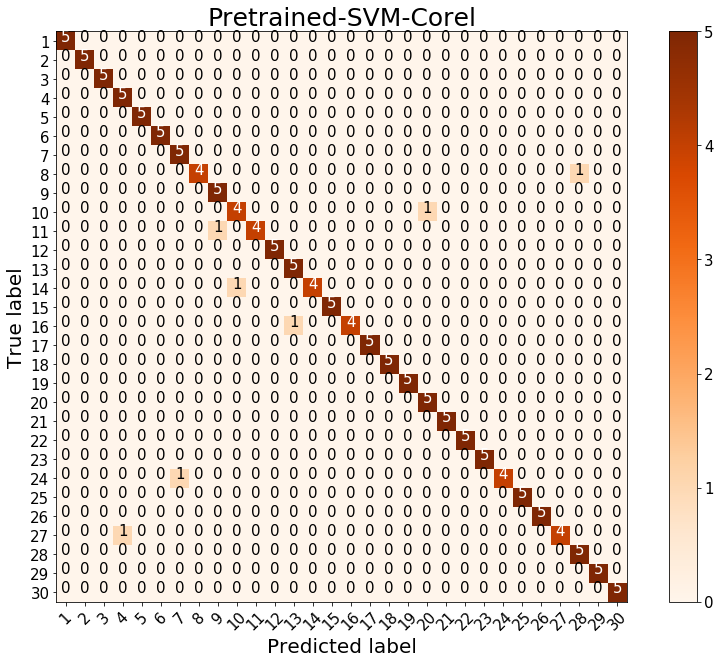

SVMの分類精度 =  0.9595959595959596


In [10]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# SVM (linear)
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(data, truth)
#テストデータの予測をする
predictLabel = svc.predict(Corel_fc2_query)
cm = confusion_matrix(testTruth, predictLabel)
# print ("SVM(linear(10))\n",cm)

classes = ['1', '2', '3', '4', '5',	'6', '7', '8', '9', '10',
           '11', '12', '13', '14', '15','16', '17', '18', '19', '20',
           '21','22','23','24','25','26','27','28','29','30']

plot_confusion_matrix(cm, classes=classes, title='Pretrained-SVM-Corel')
plt.savefig('pdf/Pretrained-SVM-Corel.pdf')
plt.show()

denominator = 0
numerator = 0
for i in range(num_images):
    numerator += cm[i,i]
    for j in range(num_images):
        denominator += cm[i,j]

accuracy = float(numerator)/denominator
print("SVMの分類精度 = ",accuracy)

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(256,input_dim=4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(30,activation='softmax'))
my_compile = model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1048832   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                7710      
Total params: 1,057,566
Trainable params: 1,057,054
Non-trainable params: 512
_________________________________________________________________


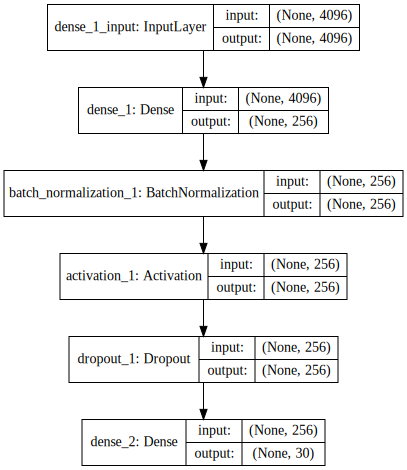

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='images/Python-Pretrained-Corel.jpg')
plot_model(model, show_shapes=True, to_file='pdf/Python-Pretrained-Corel.pdf')

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [13]:
print('訓練データ: シェープ = ', Corel_fc2_training.shape)
print('訓練データのラベル: シェープ = ', truth.shape)
import numpy as np
from keras.utils import np_utils


NB_CLASSES = 30
my_label  = np_utils.to_categorical(truth, NB_CLASSES)
# print(truth)

thy_label = np_utils.to_categorical(testTruth, NB_CLASSES)

訓練データ: シェープ =  (600, 4096)
訓練データのラベル: シェープ =  (600,)


In [14]:
print(Corel_fc2_training.shape)
print(my_label.shape)

print(Corel_fc2_query.shape)
print(thy_label.shape)

(600, 4096)
(600, 30)
(150, 4096)
(150, 30)


In [15]:

my_fit = model.fit(Corel_fc2_training, my_label, 
                   epochs=20, 
                   batch_size=128,
                   validation_data=(Corel_fc2_query, thy_label))

Train on 600 samples, validate on 150 samples
Epoch 1/20
600/600 [==============================] - 0s 792us/step - loss: 1.7915 - acc: 0.5850 - val_loss: 0.4160 - val_acc: 0.9000
Epoch 2/20
600/600 [==============================] - 0s 211us/step - loss: 0.2890 - acc: 0.9550 - val_loss: 0.3379 - val_acc: 0.9200
Epoch 3/20
600/600 [==============================] - 0s 211us/step - loss: 0.1715 - acc: 0.9850 - val_loss: 0.3096 - val_acc: 0.9533
Epoch 4/20
600/600 [==============================] - 0s 206us/step - loss: 0.0995 - acc: 0.9967 - val_loss: 0.2783 - val_acc: 0.9667
Epoch 5/20
600/600 [==============================] - 0s 213us/step - loss: 0.0709 - acc: 0.9967 - val_loss: 0.2708 - val_acc: 0.9667
Epoch 6/20
600/600 [==============================] - 0s 213us/step - loss: 0.0511 - acc: 1.0000 - val_loss: 0.2705 - val_acc: 0.9467
Epoch 7/20
600/600 [==============================] - 0s 213us/step - loss: 0.0418 - acc: 1.0000 - val_loss: 0.2551 - val_acc: 0.9467
Epoch 8/20
600/6

In [16]:
# Matplotlibのフォントの制御（大きさや種類）
%matplotlib inline
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


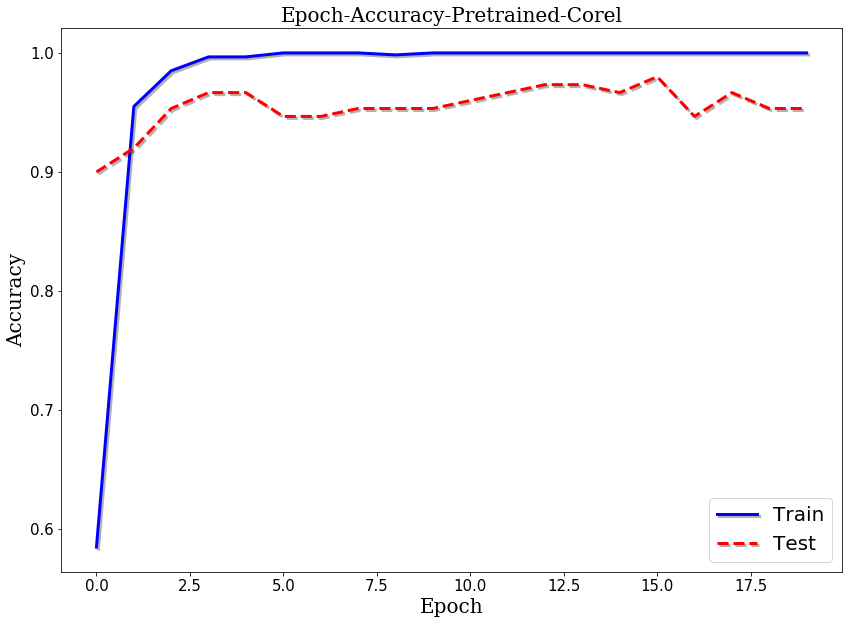

In [17]:
% matplotlib inline
import matplotlib.pyplot as plt

# 精度グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(my_fit.history['acc'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(my_fit.history['val_acc'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.tick_params(labelsize=15)
plt.title('Epoch-Accuracy-Pretrained-Corel',fontsize=25,font_properties=fp2)
plt.ylabel('Accuracy',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)

plt.savefig('pdf/Epoch-Accuracy-Pretrained-Corel.pdf')
plt.show()


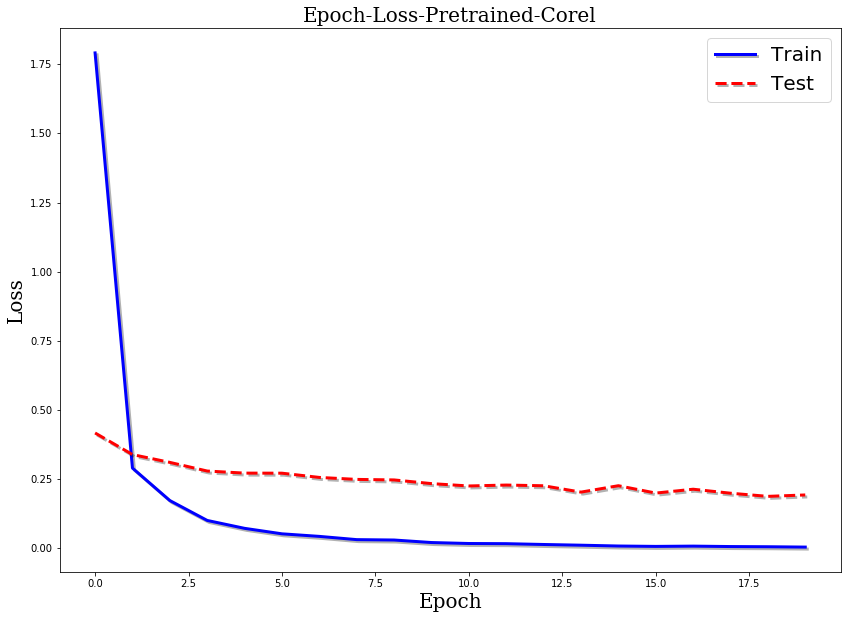

In [18]:
# 損失グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(my_fit.history['loss'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(my_fit.history['val_loss'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.title('Epoch-Loss-Pretrained-Corel',fontsize=25,font_properties=fp2)
plt.ylabel('Loss',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)
plt.savefig('pdf/Epoch-Loss-Pretrained-Corel.pdf')
plt.show()

In [19]:
a_pred = model.predict_classes(Corel_fc2_query, batch_size=128, verbose=1)
print(a_pred)


150/150 [==============================] - 0s 360us/step
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7 27  7  7  8  8  8  8  8  9 21 19
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 20 22  8 23 23 23 23
 24 24 24 24 24 25  0 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28
 28  0 29 29 29 29]


Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0

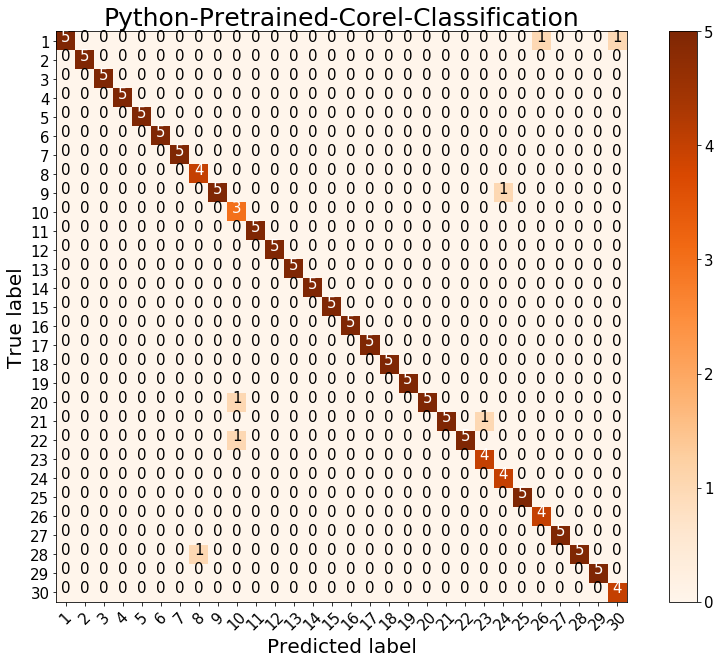

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

a_cm = confusion_matrix(a_pred, testTruth) 
plot_confusion_matrix(a_cm, classes=classes, 
                      title='Python-Pretrained-Corel-Classification')
plt.savefig('Python-Pretrained-Corel-Classification.pdf')
plt.show()


In [21]:
count = 0
total = len(testTruth)
for i in range(total):
    if testTruth[i] == a_pred[i]:
        count += 1
accuracy = float(count)/total
print("Corel画像の分類精度 = ",accuracy) 


Corel画像の分類精度 =  0.9533333333333334
